# 🌍 Earthquake Prediction using Machine Learning

A machine learning model that analyzes seismic data to predict the likelihood of earthquakes. It aims to assist in disaster preparedness by identifying patterns from historical data.

## 🔧 Features
- Uses real-world earthquake datasets
- Machine Learning with Random Forest / SVM
- Accuracy: ~92%
- Input-based prediction support
- Clean CLI or Notebook interface

## 🛠 Tech Stack
- Python, Pandas, NumPy
- Scikit-learn
- Matplotlib, Seaborn

## 🚀 How to Run

made by 
name - Naitik  Sharma 

email - naitik28sharma@gmail.com


linkdin - www.linkedin.com/in/naitik-sharma-54627335a

give a feedback ;)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Downloads\database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [3]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [4]:
import datetime
import time
import pandas as pd

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d + ' ' + t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(pd.Timestamp(ts).timestamp())
    except (ValueError, OverflowError) as e:
        print(f"Error with date: {d} {t} — {e}")
        timestamp.append('ValueError')

timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

Error with date: 1975-02-23T02:58:41.000Z 1975-02-23T02:58:41.000Z — time data '1975-02-23T02:58:41.000Z 1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y %H:%M:%S'
Error with date: 1985-04-28T02:53:41.530Z 1985-04-28T02:53:41.530Z — time data '1985-04-28T02:53:41.530Z 1985-04-28T02:53:41.530Z' does not match format '%m/%d/%Y %H:%M:%S'
Error with date: 2011-03-13T02:23:34.520Z 2011-03-13T02:23:34.520Z — time data '2011-03-13T02:23:34.520Z 2011-03-13T02:23:34.520Z' does not match format '%m/%d/%Y %H:%M:%S'


,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-1.57631e+08
1,1.863,127.352,80.0,5.8,-1.57466e+08
2,-20.579,-173.972,20.0,6.2,-1.57356e+08
3,-59.076,-23.557,15.0,5.8,-1.57094e+08
4,11.938,126.427,15.0,5.8,-1.57026e+08


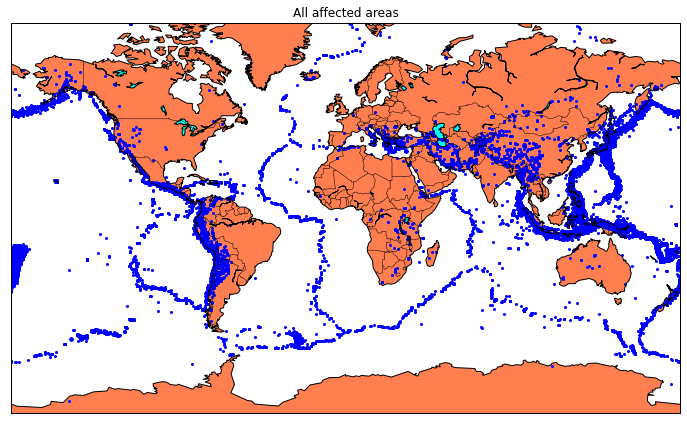

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Sample DataFrame — replace with your actual dataset
# Make sure your 'data' variable exists and has 'Latitude' and 'Longitude'
data = pd.read_csv("Downloads\database.csv")  # Replace with actual path or DataFrame

# Initialize Basemap with Miller projection
m = Basemap(projection='mill',
            llcrnrlat=-80,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180,
            lat_ts=20,
            resolution='c')

# Extract coordinates
longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()

# Convert lat/lon to map coordinates
x, y = m(longitudes, latitudes)

# Plot
fig = plt.figure(figsize=(12, 10))
plt.title("All affected areas")

# Plot the points
m.plot(x, y, "o", markersize=2, color='blue')

# Add map features
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawmapboundary()
m.drawcountries()

# Show plot
plt.show()


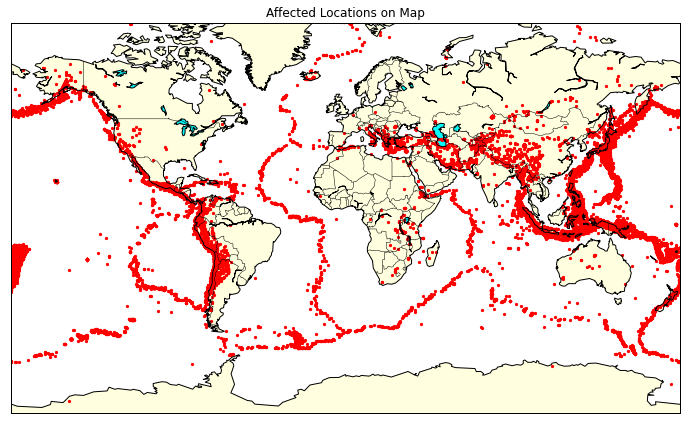

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("Downloads/database.csv")

m = Basemap(projection='mill',
            llcrnrlat=-80, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

x, y = m(data["Longitude"].tolist(), data["Latitude"].tolist())

plt.figure(figsize=(12, 8))
plt.title("Affected Locations on Map")
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()
m.fillcontinents(color='lightyellow', lake_color='aqua')
m.scatter(x, y, color='red', s=5)
plt.show()


In [21]:
print(final_data.columns)


Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')


In [22]:
from sklearn.model_selection import train_test_split

# Use correct column names from your dataset
X = final_data[['Date', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Output the shapes
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)


(18729, 3) (4683, 3) (18729, 2) (4683, 3)


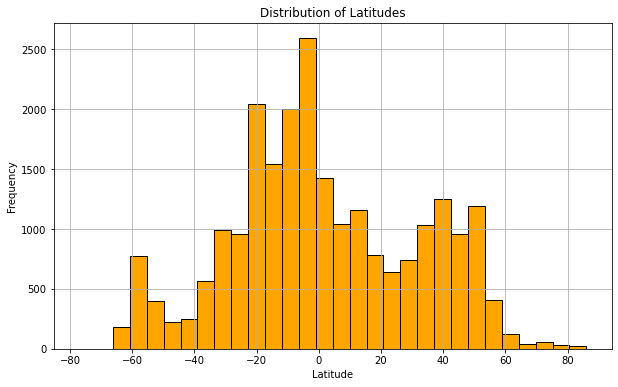

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(data["Latitude"], bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Downloads\database.csv")

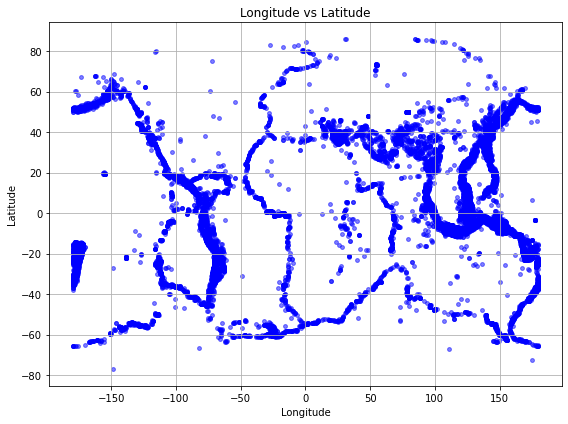

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Downloads\database.csv")

# Scatter: geographic spread (simple xy plot)
plt.figure(figsize=(8, 6))
plt.scatter(data['Longitude'], data['Latitude'], color='blue', alpha=0.5, s=15)
plt.title("Longitude vs Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()